# Inicjalizacja kontrolera

In [1]:
import can
import matplotlib.pyplot as plt
from matplotlib import interactive
import numpy as np
import os
import time
import math
from IPython.display import display, clear_output
from joint_can import *
%matplotlib widget

In [2]:
def calibrate_joint(cmd,bus,nr_id):
    send_msg(0x1A0 + nr_id, None, bus)
    time.sleep(2)
    send_msg(0x1F0 + nr_id, [1,6], bus)
    send_msg(0x110 + nr_id, [1], bus)
    
    if (send_msg(0x110 + nr_id, None, bus).data[0] == 1):
        send_msg(0x110 + nr_id, [cmd], bus)
        time.sleep(1)
        return True
    else:
        return False
        # print(send_msg(0x010, [3], bus).data[0])
        # time.sleep(5)        

In [3]:
# Ustawienie adresu CAN na "nr_id"

def initialize_joint(bus, mode: int, nr_id):
    send_msg(0x1A0 + nr_id, None, bus)
    time.sleep(1)
    
    send_msg(0x1b0 + nr_id, [0,0,0,0,0,0], bus)
    time.sleep(0.1)
    send_msg(0x140 + nr_id, None, bus)
    time.sleep(0.1)
    send_msg(0x1a0 + nr_id, None, bus)
    time.sleep(1)
    
    if (send_msg(0x1F0 + nr_id, [mode, 2], bus).data[0] == 1):
        send_msg(0x110 + nr_id, [2], bus)
        time.sleep(1)
        send_msg(0x110 + nr_id, [3], bus).data[0]
        time.sleep(5)
        return True
    else:
        return False
      

In [4]:
# os.popen('/home/pi/mech_diagnostics/can_down.sh')
# time.sleep(1)
# os.popen('/home/pi/mech_diagnostics/can_up.sh')
# time.sleep(1)


In [5]:
bus = can.interface.Bus(bustype='socketcan', channel='can0', bitrate=1000000, data_bitrate=5000000, fd=True)

# Parametry kalibracji

In [6]:
nr_id = get_can_id(bus)

In [7]:
serial="JANUSZ_6_RI80_B001905087" #musi byc min jedna litera w numerze
note="Janusz 6 - joint 2"  #póki co musi być cokolwiek

In [8]:
path = "/home/pi/mech_diagnostics/diagnostic_data"
try: 
    os.mkdir(path+'/'+serial) 
except OSError as error: 
    pass

In [9]:
initialize_joint(bus,2, nr_id)

True

# Kalibracja enkodera absolutnego

In [10]:
# while not calibrate_joint(131,bus,nr_id): # 131 uruchomienie kalibracji enk absolutnego
#     time.sleep(1)
    
# while(get_data_t(send_msg(0x180 + nr_id,None,bus)).FSM != 1):


#     print(f'Calibration in progress\r', end='')
#     time.sleep(1)
# print('                              \r',end='')

# send_msg(0x110 + nr_id, [2], bus)
# time.sleep(0.1)
# send_msg(0x110 + nr_id, [1], bus)
# time.sleep(0.1)
# send_msg(0x140 + nr_id, None, bus)
# time.sleep(1)

# print(f'1/2 Calibration done', end='')

1/2 Calibration done          

# Kalibracja miejsca zerowego

In [9]:
while not calibrate_joint(161,bus,nr_id): # 161 uruchomienie kalibracji zera
    time.sleep(0.5)
    
while(get_data_t(send_msg(0x180 + nr_id,None,bus)).FSM != 1):


    print(f'Calibration in progress\r', end='')
    time.sleep(1)
print('                              \r',end='')

send_msg(0x110 + nr_id, [2], bus)
time.sleep(0.1)
send_msg(0x110 + nr_id, [1], bus)
time.sleep(0.1)
send_msg(0x140 + nr_id, None, bus)
time.sleep(1)

print(f'2/2 Calibration done', end='')

2/2 Calibration done          

# Test enkoderów

In [10]:
# # do sprawdzenia enkodera nie uruchamiać bloków sekcji 1
# send_msg(0x1A0 + nr_id, None, bus)
# time.sleep(1)
# send_msg(0x1F0 + nr_id, [2,2], bus)
# send_msg(0x110 + nr_id, [2], bus)
# time.sleep(0.1)
# send_msg(0x110 + nr_id, [3], bus)
# time.sleep(6)

In [11]:
# position_data=[]
# speed_data=[]

# set_speed(0.1,bus,nr_id)
# time.sleep(1)

# run_time=60
# start_time=time.time()

# while((time.time()-start_time)<(run_time)):
#     data=set_speed(0.12,bus,nr_id)
#     position_data.append(data.position)
#     speed_data.append(data.speed)
# set_speed(0,bus, nr_id)

KeyboardInterrupt: 

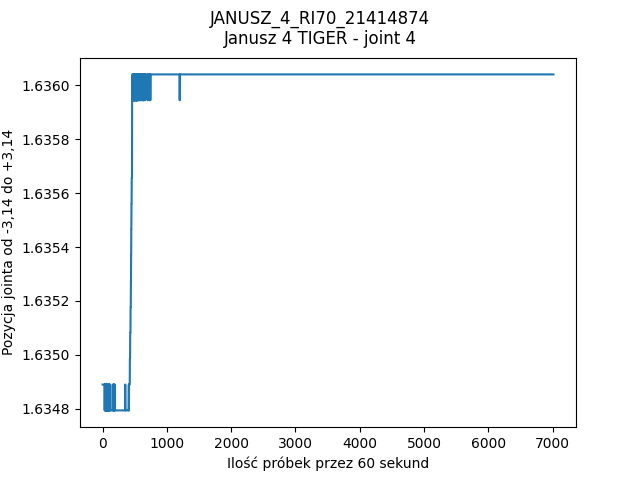

In [13]:
# plt.plot(position_data)
# # plt.plot(speed_data)
# plt.suptitle(serial+ '\n' +note)
# plt.xlabel('Ilość próbek przez {} sekund'.format(run_time))
# plt.ylabel('Pozycja jointa od -3,14 do +3,14')
# plt.show()
# plt.savefig(path+'/'+serial+'/enkoder_'+serial+'_'+time.strftime('%y_%m_%d_%H_%M')+'.png', dpi=150)

# ustawienie na zerze [uruchomić komórki 1.1-1.5]

In [ ]:
initialize_joint(bus,2, nr_id)

In [10]:
send_msg(0x1A0 + nr_id, None, bus)
time.sleep(1)
send_msg(0x1F0 + nr_id, [2,2], bus)
send_msg(0x110 + nr_id, [2], bus)
time.sleep(1)
send_msg(0x110 + nr_id, [3], bus)
time.sleep(2)


data=set_speed(0,bus,nr_id)
sgn=(int(data.position>0) - int(data.position<0))

data=set_speed(sgn*0.1,bus,nr_id)
print(data.position)
while(abs(data.position)>0.01):
    if (abs(data.position)>0.2):
        data=set_speed(sgn*-0.4,bus,nr_id)
    else:
        data=set_speed(sgn*-0.05,bus,nr_id)
    time.sleep(0.1)

send_msg(0x110 + nr_id, [2], bus)
print(data.position)

0.013039234616817377
0.00987530268773669


In [12]:
# send_msg(0x1A0 + nr_id, None, bus)
# initialize_joint(bus,2, nr_id)

True

# Odczytywanie w pętli bierzącej pozycji

In [11]:
# spin = 1
# while (spin < 50):
#     data=set_torque(0,bus,nr_id)
#     # print(f'\r {abs(data.position)}' , end='')
#     print(f'{abs(data.position)}\n' , end='')
#     spin += 1

2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
2.7833013537464573
